# Homework 9 (DL Monday, December 4 at 12:00 PM)
#### ELEC-E8740 - Basics of sensor fusion - Autumn 2023

In [1]:
import numpy as np
import scipy.linalg as linalg
import matplotlib.pyplot as plt

#### Consider the following 1D non-linear model
$$
x_k = tanh(x_{k−1}) + q_{k−1}, \\
y_k = sin(x_k) + r_k,
$$
where $x_0 \sim \mathcal{N} (0, 1)$, $q_{k−1} \sim \mathcal{N} (0, 0.1^2)$, and $r_k \sim \mathcal{N} (0, 0.1^2)$.

### Part a (1 point): Simulate 100 steps of states and measurements from the model. Plot the data.

In [4]:
def model_simulation(seed_number, steps):
    """ 
    1D non-linear model simulation
    -------
    Input:
        seed_number: it is used to generate the same sequence of random numbers
        steps: number of steps
    Output:
        xs: state trajectory
        ys: measurement tajectory
        
    """
    np.random.seed(seed_number)      # do not change this line
    xs = np.zeros((steps, 1))        # do not change this line
    ys = np.zeros((steps, 1))        # do not change this line
    # To draw random samples from a normal (Gaussian) distribution, you could use np.random.normal function
    # Attention: the arguments of np.random.normal are mean and "Standard deviation"
    # YOUR CODE HERE
    for i in range(1, steps):
        xs[i] = np.tanh(xs[i-1]) + np.random.normal(0, 0.1**2)
        ys[i] = np.sin(xs[i]) + np.random.normal(0, 0.1**2)
    # raise NotImplementedError()
    return xs, ys # do not change this line

Feel free to uncomment and run the given code below.

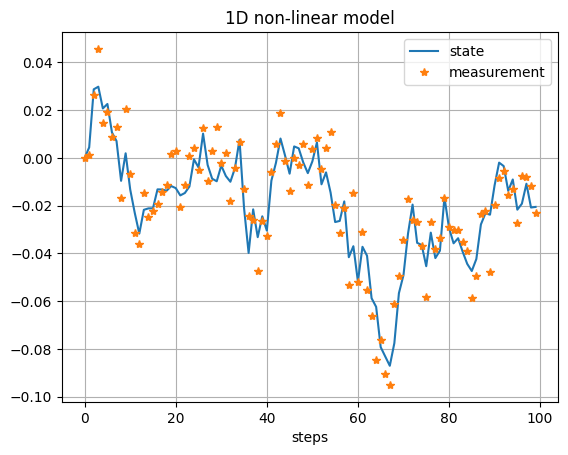

In [5]:
xs, ys = model_simulation(5, 100)
plt.plot(xs, label='state')
plt.plot(ys, '*', label='measurement')
plt.title('1D non-linear model')
plt.xlabel('steps')
plt.legend()
plt.grid();

### Part b (1 point): Derive the necessary derivatives.

In [6]:
def derivatives_ssm(x):
    """ 
    Derivatives of dynamic functin and measurement function
    -------
    Input:
        x: state
    Output:
        Fx: value of derivative of the dynamic function tanh(.) at state x
        Gx: value of derivative of the measurement function sin(.) at state x
        
    """    
    # Fx = ?
    # Gx = ?
    # YOUR CODE HERE
    # raise NotImplementedError()
    Fx = 1 - np.tanh(x)**2
    Gx = np.cos(x)
    return Fx, Gx # do not change this line
    

In [7]:
assert np.allclose(derivatives_ssm(0), (1.0, 1.0), rtol=1e-03, atol=1e-04)
assert np.allclose(derivatives_ssm(-np.pi/2), (0.159, 0.0), rtol=1e-03, atol=1e-04)


### Part b (1 point): and check that they are correct by using numerical finite differences.
To approximately find the derivative a function $f(.)$ using finite difference method, you could select a small step size $h$ and compute $\frac{f(x + h) - f(x)}{h}$. In this part, use this method to find the derivatives of the dynamic function $tanh(.)$ and measurement function $sin()$.

In [ ]:
def derivatives_numerically(x, h):
    """ 
    Derivatives of dynamic functin and measurement function by using numerical finite differences 
    -------
    Input:
        x: state
        h: step size
    Output:
        Fx_n: value of numerical derivative of the dynamic function tanh(.) at state x
        Gx_n: value of numerical derivative of the measurement function sin(.) at state x
        
    """
    # YOUR CODE HERE
    Fx_n = (np.tanh(x+h) - np.tanh(x))/(h)
    Gx_n = (np.sin(x+h) - np.sin(x))/(h)

    # raise NotImplementedError()
    return Fx_n, Gx_n # do not change this line

In [ ]:
assert np.allclose(derivatives_numerically(0.0, 0.5), (0.924, 0.958), rtol=1e-03, atol=1e-04)
assert np.allclose(derivatives_numerically(0.0, 1e-6), (0.999, 0.999), rtol=1e-03, atol=1e-04)
assert np.allclose(derivatives_numerically(-np.pi/2, 1e-6), (0.159, 5e-7), rtol=1e-03, atol=1e-04)


### Part c (1 point): Implement and run EKF for the model. Plot the results.
#### Note: the input of the following "Extended_Kalman_Filter" function is only the measurements. Please do not change that and define any nesessary parameters inside the function.

#### The output should be Extended Kalman filter means and covariances of the whole trajectory.

In [ ]:
def Extended_Kalman_Filter(Y):
    """ 
    Extended Kalman filter state estimation for 1D non-linear state space model
    
    -------
    Input:
        Y: measurements
    Output:
        mean_ekf: Extended Kalman filter mean estimation
        cov_ekf: Extended Kalman filter covariance estimation
        
    """
    steps = Y.shape[0]
    mean_ekf = np.zeros((steps, 1))      # do not change this line
    cov_ekf = np.zeros((steps, 1, 1))    # do not change this line
    # YOUR CODE HERE
    raise NotImplementedError()
    return mean_ekf, cov_ekf # do not change this line

Feel free to uncomment and run the given code below.

In [ ]:
# observations =  model_simulation(1, 100)[1]
# x_ekf, cov_ekf = Extended_Kalman_Filter(observations)
# plt.figure(figsize=(15,6))
# plt.plot(model_simulation(1, 100)[0], label='true state')
# plt.plot(x_ekf[:,0], 'r--', label='EKF estimation')
# plt.legend()
# plt.grid();